In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("Desktop/Data Science/E-com_Data.xlsx")
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [3]:
df.shape

(537979, 12)

In [4]:
df.size

6455748

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
df.duplicated().sum()

np.int64(9)

In [7]:
df['Date of purchase'].max()

Timestamp('2017-12-19 00:00:00')

In [8]:
df['Date of purchase'].min()

Timestamp('2016-12-02 00:00:00')

In [9]:
df = df.drop_duplicates()


In [10]:
df.shape

(537970, 12)

In [11]:
df.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
dtype: int64

In [12]:
(df.isnull().sum()/len(df))*100

CustomerID            24.869231
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448798
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [13]:
df['Time'].head()

0    15:36:00
1    14:53:00
2    14:53:00
3    14:47:00
4    14:53:00
Name: Time, dtype: object

In [14]:
df['Time'].dtype

dtype('O')

In [15]:
df['Time'].isna().sum()
df['Time'].unique()[:20]


array([datetime.time(15, 36), datetime.time(14, 53),
       datetime.time(14, 47), datetime.time(12, 43),
       datetime.time(14, 46), datetime.time(9, 22), datetime.time(10, 55),
       datetime.time(17, 48), datetime.time(12, 17),
       datetime.time(11, 55), datetime.time(10, 30),
       datetime.time(12, 10), datetime.time(13, 13),
       datetime.time(10, 28), datetime.time(10, 51),
       datetime.time(14, 23), datetime.time(8, 13), datetime.time(12, 59),
       datetime.time(15, 1), datetime.time(11, 18)], dtype=object)

In [16]:
import datetime as dt

df['Datetime'] = df.apply(
    lambda row: dt.datetime.combine(row['Date of purchase'].date(), row['Time']),
    axis=1
)


In [17]:
df['Datetime'].dtype

dtype('<M8[ns]')

In [18]:
df=df.drop(columns=['Time'])


In [19]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Datetime
0,4355.0,15734,398177,2017-10-29,6,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29 15:36:00
1,4352.0,14616,394422,2017-10-05,2,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-10-05 14:53:00
2,4352.0,14614,394422,2017-10-12,2,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-10-12 14:53:00
3,4352.0,85014B,388633,2017-08-22,3,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22 14:47:00
4,4352.0,15364,394422,2017-10-10,2,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10 14:53:00


In [20]:
df.isnull().sum()

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529625
Reason of return     537967
Sold as set          537970
Datetime                  0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df = df.dropna(subset=['CustomerID'])


In [23]:
df.shape

(404181, 12)

In [24]:
df=df.drop(columns=['Cancelled_status','Reason of return','Sold as set'])
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Datetime
0,4355.0,15734,398177,2017-10-29,6,321.0,1926.0,Location 1,2017-10-29 15:36:00
1,4352.0,14616,394422,2017-10-05,2,870.0,1740.0,Location 1,2017-10-05 14:53:00
2,4352.0,14614,394422,2017-10-12,2,933.0,1866.0,Location 1,2017-10-12 14:53:00
3,4352.0,85014B,388633,2017-08-22,3,623.0,1869.0,Location 1,2017-08-22 14:47:00
4,4352.0,15364,394422,2017-10-10,2,944.0,1888.0,Location 1,2017-10-10 14:53:00


In [25]:
df.shape

(404181, 9)

In [26]:
reference_date = df['Date of purchase'].max() + pd.Timedelta(days=1)


In [27]:
rfm=df.groupby('CustomerID').agg(recency=('Date of purchase',lambda x:(reference_date-x.max()).days),
                         frequency=('InvoieNo','nunique'),
monetary=('Price','sum')).reset_index()

In [28]:
rfm

,CustomerID,recency,frequency,monetary
0,2.0,4,7,553704.0
1,3.0,77,4,257404.0
2,4.0,19,1,176613.0
3,5.0,311,1,41976.0
4,6.0,37,8,151822.0
...,...,...,...,...
4344,4368.0,278,1,20480.0
4345,4369.0,181,1,10774.0
4346,4370.0,9,3,24962.0
4347,4371.0,4,16,280608.0


In [29]:
rfm[['recency','frequency','monetary']].describe()

,recency,frequency,monetary
count,4349.000000,4349.000000,4.349000e+03
mean,93.299379,4.964590,2.299380e+05
std,100.701315,9.041463,8.572589e+05
min,1.000000,1.000000,-5.037200e+04
25%,18.000000,1.000000,3.814800e+04
50%,51.000000,3.000000,8.365500e+04
75%,144.000000,5.000000,2.056120e+05
max,381.000000,243.000000,3.553619e+07


In [30]:
(df['Quantity']<0).value_counts()

Quantity
False    395998
True       8183
Name: count, dtype: int64

In [31]:
(df['Price']<0).value_counts()

Price
False    395998
True       8183
Name: count, dtype: int64

In [32]:
df_rfm_base = df[
    (df['Quantity'] > 0) &
    (df['Price'] > 0)
].copy()


In [33]:
df_rfm_base.shape

(395998, 9)

In [34]:
df_rfm_base

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Datetime
0,4355.0,15734,398177,2017-10-29,6,321.0,1926.0,Location 1,2017-10-29 15:36:00
1,4352.0,14616,394422,2017-10-05,2,870.0,1740.0,Location 1,2017-10-05 14:53:00
2,4352.0,14614,394422,2017-10-12,2,933.0,1866.0,Location 1,2017-10-12 14:53:00
3,4352.0,85014B,388633,2017-08-22,3,623.0,1869.0,Location 1,2017-08-22 14:47:00
4,4352.0,15364,394422,2017-10-10,2,944.0,1888.0,Location 1,2017-10-10 14:53:00
...,...,...,...,...,...,...,...,...,...
537945,37.0,14693,402292,2017-11-28,1,384.0,384.0,Location 8,2017-11-28 12:07:00
537946,37.0,14693,402292,2017-11-27,1,398.0,398.0,Location 8,2017-11-27 12:07:00
537947,21.0,77618,363890,2016-12-21,8,308.0,2464.0,Location 8,2016-12-21 12:58:00
537948,21.0,85194L,363890,2016-12-21,36,113.0,4068.0,Location 8,2016-12-21 12:58:00


In [35]:
rfm=df_rfm_base.groupby('CustomerID').agg(recency=('Date of purchase',lambda x:(reference_date-x.max()).days),
                         frequency=('InvoieNo','nunique'),
monetary=('Price','sum')).reset_index()

In [36]:
rfm

,CustomerID,recency,frequency,monetary
0,2.0,4,7,553704.0
1,3.0,77,4,257404.0
2,4.0,19,1,176613.0
3,5.0,311,1,41976.0
4,6.0,37,7,166972.0
...,...,...,...,...
4319,4368.0,278,1,20480.0
4320,4369.0,181,1,10774.0
4321,4370.0,9,2,25177.0
4322,4371.0,4,16,280608.0


In [37]:
df_returns = df[
    (df['Quantity'] < 0) &
    (df['Price'] < 0)
]


In [38]:
rfm_df=rfm[['recency','frequency','monetary']].copy()

In [40]:
rfm_log=np.log1p(rfm_df)


In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_log)

In [42]:
rfm_scaled=pd.DataFrame(rfm_scaled,columns=rfm_df.columns,index=rfm_df.index)

In [43]:
rfm_scaled.shape

(4324, 3)

In [44]:
rfm_scaled.head()

,recency,frequency,monetary
0,-1.774513,1.084220,1.441972
1,0.369792,0.394052,0.826758
2,-0.692480,-0.951459,0.524217
3,1.451824,-0.951459,-0.629814
4,-0.191499,1.084220,0.479131


In [45]:
rfm_scaled.isna().sum()

recency      0
frequency    0
monetary     0
dtype: int64

In [46]:
rfm_scaled.shape

(4324, 3)

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)


In [52]:
wcss

[12972.0,
 6418.700317299679,
 4780.565624328475,
 3863.0346082545934,
 3207.8155185897613,
 2795.2358397906273,
 2492.1674049933836,
 2273.2962926491405,
 2094.4893860349753,
 1948.8111634759941]

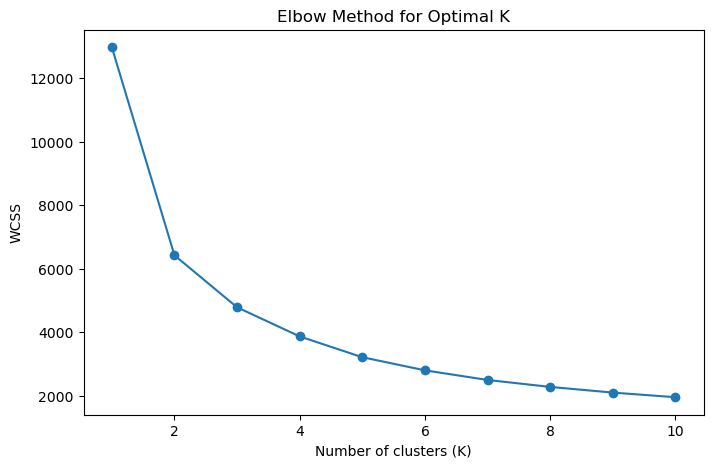

In [53]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()



In [67]:
wcss = []

kmeans = KMeans(n_clusters=4,random_state=99,n_init=10)
kmeans.fit(rfm_scaled)
cluster_labels = kmeans.fit_predict(rfm_scaled)


In [68]:
cluster_labels

array([2, 1, 3, ..., 3, 2, 1], dtype=int32)

In [69]:
from sklearn.metrics import silhouette_score,silhouette_samples


In [70]:
sil_score=silhouette_score(rfm_scaled,cluster_labels)
print(sil_score)

0.33163327608663684


In [71]:
for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(rfm_scaled)
    score = silhouette_score(rfm_scaled, labels)
    print(f"K={k} → Silhouette Score: {score:.4f}")


K=3 → Silhouette Score: 0.3340
K=4 → Silhouette Score: 0.3327
K=5 → Silhouette Score: 0.3199


In [72]:
kmeans=KMeans(n_clusters=4,random_state=99,n_init=10)
rfm['cluster']=kmeans.fit_predict(rfm_scaled)

In [75]:
cluster_summary=(rfm.groupby('cluster').agg({'recency':'mean','frequency':'mean','monetary':'mean'}).round(2))
cluster_summary

,recency,frequency,monetary
cluster,,,
0,198.27,1.34,45504.23
1,64.48,4.17,213408.52
2,12.66,13.50,888079.58
3,25.67,1.86,60762.03


In [76]:
cluster_summary['R_rank'] = cluster_summary['recency'].rank(ascending=False)
cluster_summary['F_rank'] = cluster_summary['frequency'].rank(ascending=True)
cluster_summary['M_rank'] = cluster_summary['monetary'].rank(ascending=True)

cluster_summary['cluster_score'] = (
    cluster_summary['R_rank'] +
    cluster_summary['F_rank'] +
    cluster_summary['M_rank']
)

cluster_summary


,recency,frequency,monetary,R_rank,F_rank,M_rank,cluster_score
cluster,,,,,,,
0,198.27,1.34,45504.23,1.0,1.0,1.0,3.0
1,64.48,4.17,213408.52,2.0,3.0,3.0,8.0
2,12.66,13.50,888079.58,4.0,4.0,4.0,12.0
3,25.67,1.86,60762.03,3.0,2.0,2.0,7.0


In [77]:
cluster_order = (
    cluster_summary
    .sort_values('cluster_score')
    .index
)

cluster_mapping = {
    cluster_order[0]: 0,  # Lowest value customers
    cluster_order[1]: 1,
    cluster_order[2]: 2,
    cluster_order[3]: 3   # Best customers
}

rfm['customer_level'] = rfm['cluster'].map(cluster_mapping)


In [78]:
rfm.groupby('customer_level')[['recency','frequency','monetary']].mean().round(2)


,recency,frequency,monetary
customer_level,,,
0,198.27,1.34,45504.23
1,25.67,1.86,60762.03
2,64.48,4.17,213408.52
3,12.66,13.50,888079.58


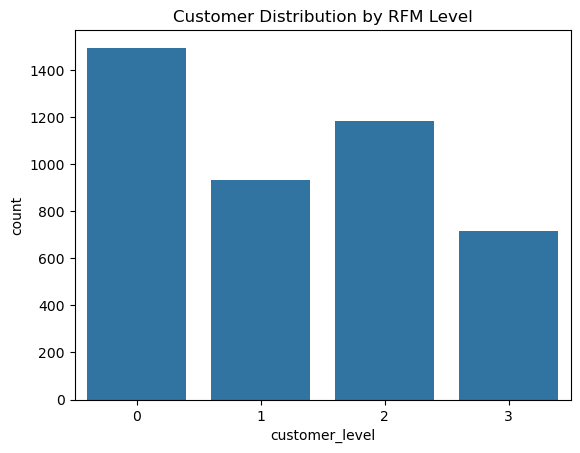

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='customer_level', data=rfm)
plt.title('Customer Distribution by RFM Level')
plt.show()


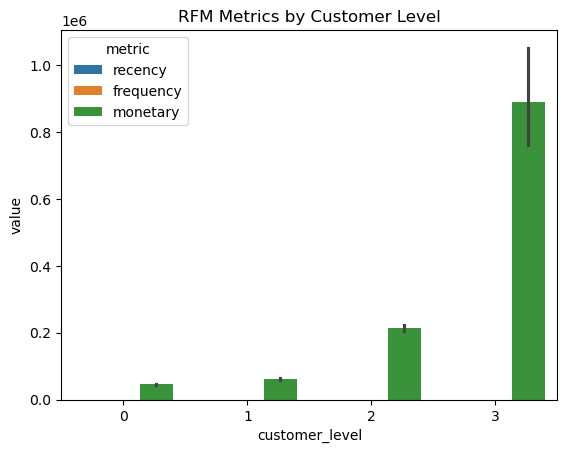

In [80]:
rfm_melted = rfm.melt(
    id_vars='customer_level',
    value_vars=['recency','frequency','monetary'],
    var_name='metric',
    value_name='value'
)

sns.barplot(
    data=rfm_melted,
    x='customer_level',
    y='value',
    hue='metric'
)
plt.title('RFM Metrics by Customer Level')
plt.show()


In [81]:
level_labels = {
    0: 'Low Value / Inactive',
    1: 'At Risk',
    2: 'Loyal Customers',
    3: 'Champions'
}

rfm['segment_name'] = rfm['customer_level'].map(level_labels)


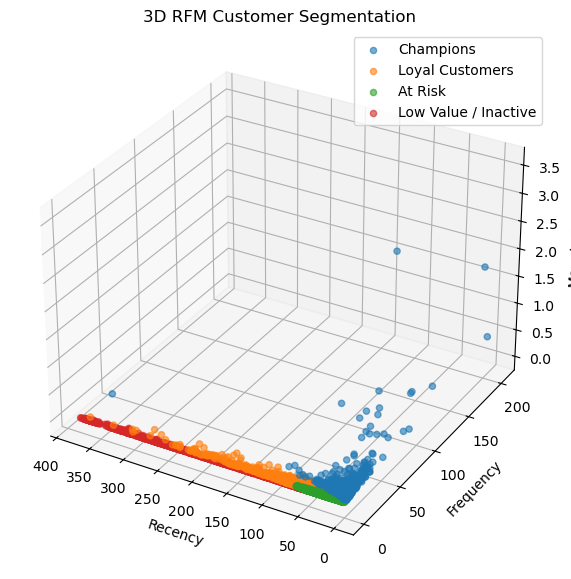

In [83]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for segment in rfm['segment_name'].unique():
    subset = rfm[rfm['segment_name'] == segment]
    ax.scatter(
        subset['recency'],
        subset['frequency'],
        subset['monetary'],
        label=segment,
        alpha=0.6
    )

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.invert_xaxis()
ax.set_title('3D RFM Customer Segmentation')
ax.legend()
plt.show()


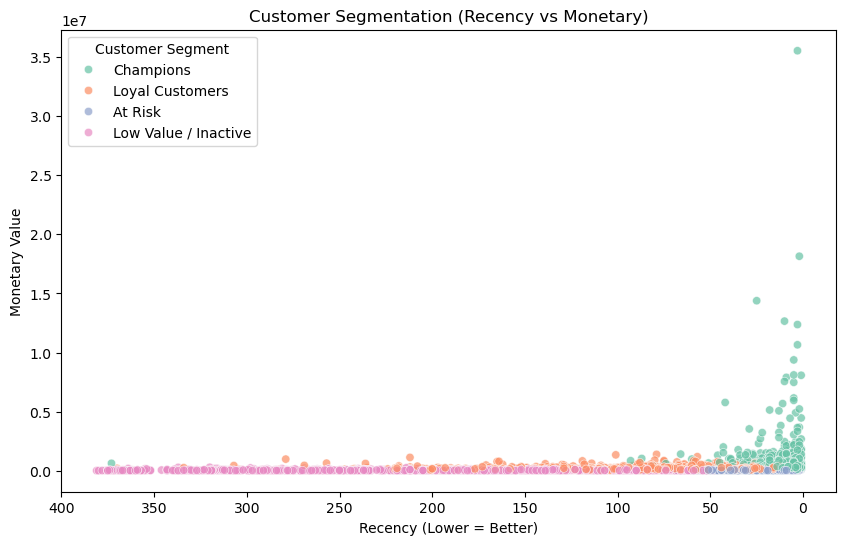

In [84]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=rfm,
    x='recency',
    y='monetary',
    hue='segment_name',
    palette='Set2',
    alpha=0.7
)

plt.gca().invert_xaxis()  # important
plt.title('Customer Segmentation (Recency vs Monetary)')
plt.xlabel('Recency (Lower = Better)')
plt.ylabel('Monetary Value')
plt.legend(title='Customer Segment')
plt.show()


In [85]:
segment_summary = (
    rfm.groupby('segment_name')[['recency', 'frequency', 'monetary']]
       .mean()
       .round(1)
)

segment_summary


,recency,frequency,monetary
segment_name,,,
At Risk,25.7,1.9,60762.0
Champions,12.7,13.5,888079.6
Low Value / Inactive,198.3,1.3,45504.2
Loyal Customers,64.5,4.2,213408.5


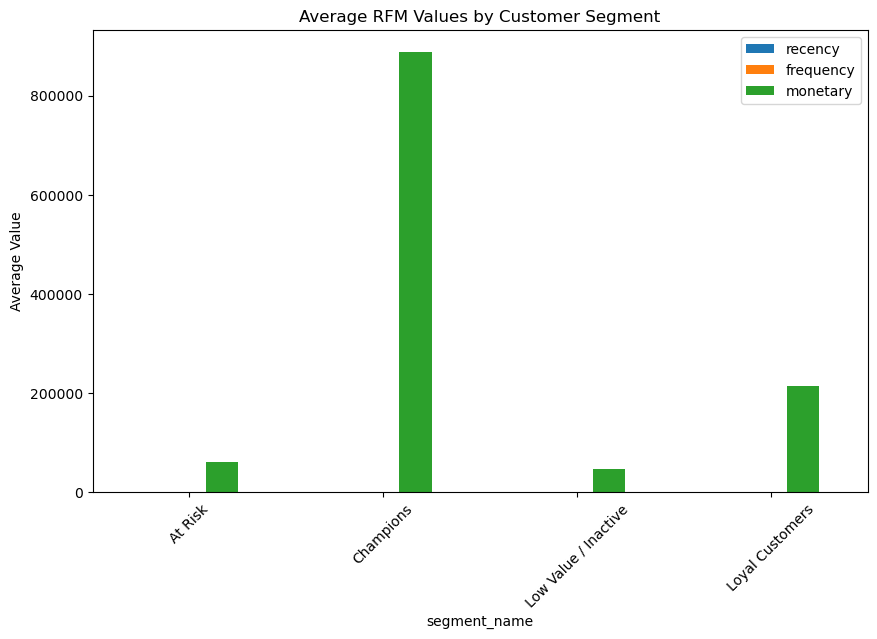

In [86]:
segment_summary.plot(kind='bar', figsize=(10,6))
plt.title('Average RFM Values by Customer Segment')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.show()


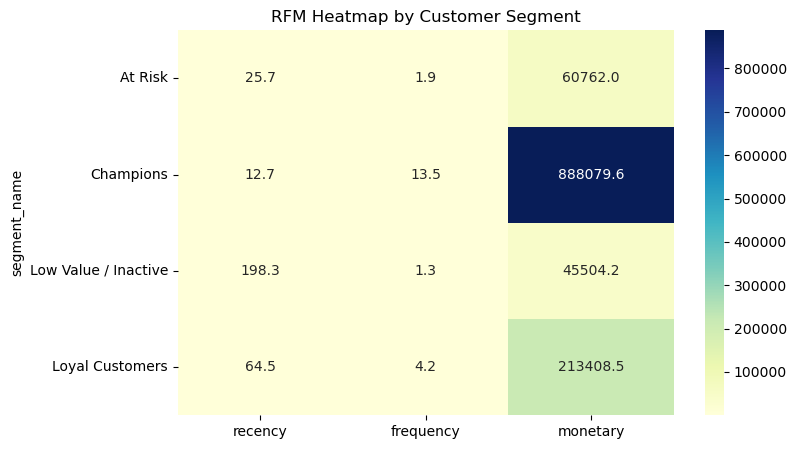

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(
    segment_summary,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu'
)
plt.title('RFM Heatmap by Customer Segment')
plt.show()


In [89]:
rfm

,CustomerID,recency,frequency,monetary,cluster,customer_level,segment_name
0,2.0,4,7,553704.0,2,3,Champions
1,3.0,77,4,257404.0,1,2,Loyal Customers
2,4.0,19,1,176613.0,3,1,At Risk
3,5.0,311,1,41976.0,0,0,Low Value / Inactive
4,6.0,37,7,166972.0,1,2,Loyal Customers
...,...,...,...,...,...,...,...
4319,4368.0,278,1,20480.0,0,0,Low Value / Inactive
4320,4369.0,181,1,10774.0,0,0,Low Value / Inactive
4321,4370.0,9,2,25177.0,3,1,At Risk
4322,4371.0,4,16,280608.0,2,3,Champions


In [90]:
import pickle

with open("rfm_customer_segments.pkl", "wb") as f:
    pickle.dump(rfm, f)


In [109]:
rfm.to_excel("rfm_customer_segments.xlsx", index=False)


In [108]:
import os
os.getcwd()

'/Users/rushikeshshinde'

#Additional Analysis--

In [ ]:
df_returns['CustomerID'].nunique()

In [91]:
df_positive=df[(df['Quantity']>0)&
(df['Price']>0)
]

In [92]:
positive_customers=df_positive['CustomerID'].nunique()
positive_customers

4324

In [93]:
return_customers=set(df_returns['CustomerID'].unique())


In [94]:
len(return_customers)

1496

In [95]:
return_customers = set(df_returns['CustomerID'].unique())
positive_customers = set(df_positive['CustomerID'].unique())


In [96]:
len(positive_customers)

4324

In [97]:
only_return_customers = return_customers - positive_customers


In [98]:
len(only_return_customers)

25

In [99]:
df[df['CustomerID'].isin(only_return_customers)].shape


(89, 9)

In [100]:
df[df['CustomerID'].isin(only_return_customers)].head()


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,price per Unit,Price,Shipping Location,Datetime
892,2893.0,14615,362924,2016-12-15,-2,892.0,-1784.0,Location 1,2016-12-15 16:15:00
893,2893.0,14616,362924,2016-12-18,-2,866.0,-1732.0,Location 1,2016-12-18 16:15:00
1064,2579.0,85014A,365371,2017-01-13,-6,695.0,-4170.0,Location 1,2017-01-13 12:58:00
28009,2579.0,14517,365371,2017-01-08,-12,148.0,-1776.0,Location 26,2017-01-08 12:58:00
29262,1800.0,15089,405713,2017-12-06,-1,373.0,-373.0,Location 26,2017-12-06 13:20:00


In [101]:
df_only_returns = df[df['CustomerID'].isin(only_return_customers)]


In [102]:
total_revenue_loss=df_only_returns['Price'].sum()


In [103]:
total_revenue_loss

np.float64(-185411.0)

In [104]:
loss_per_customer=(df_only_returns.groupby('CustomerID')['Price'].sum().sort_values())
loss_per_customer

CustomerID
2579.0   -50372.0
2893.0   -38138.0
2507.0   -14575.0
4224.0   -14052.0
1201.0   -11694.0
2437.0   -10680.0
4351.0    -8769.0
4262.0    -4476.0
3246.0    -4064.0
1005.0    -3470.0
3127.0    -3336.0
2901.0    -3268.0
2746.0    -3069.0
4030.0    -2624.0
1800.0    -2451.0
1689.0    -2353.0
1319.0    -2082.0
416.0     -1636.0
3829.0    -1199.0
213.0      -968.0
2803.0     -831.0
468.0      -398.0
3021.0     -382.0
1728.0     -315.0
3436.0     -209.0
Name: Price, dtype: float64

In [ ]:
loss_per_customer.value_counts()

In [105]:
total_revenue=df[df['Price']>0]['Price'].sum()
loss_percentage=(total_revenue_loss/total_revenue)*100
loss_percentage

np.float64(-0.018325818725496955)